In [1]:
from climada.engine import Impact

dir_impacts = "/Users/szelie/Library/CloudStorage/OneDrive-ETHZurich/data/impacts_multi_risk/results/"

hazards = ['TC', 'RF']
exposures = ['pop', 'assets']
warming_levels = ['1980_2010','2050_2080']
country = 'global'

impacts_yearsets = {warming: {exposure: {hazard: 
                   Impact.from_csv(
                       "".join([dir_impacts, hazard, '_', exposure,"_impacts_yearsets_150arcsec_", warming, "_", country, ".csv"]))
                   for hazard in hazards} for exposure in exposures} for warming in warming_levels}





/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mix

In [11]:
fq = impacts_yearsets['1980_2010']['assets']['RF'].calc_freq_curve(return_per=np.arange(1,100))

In [13]:
fq.impact = fq.impact + impacts_yearsets['1980_2010']['assets']['TC'].calc_freq_curve(return_per=np.arange(1,100)).impact

In [2]:
import itertools
from climada.engine import Impact

country = 'global'
warming_levels = ['1980_2010','2050_2080']
dir_impacts = {}
dir_impacts['pop'] = '/Users/szelie/OneDrive - ETH Zurich/data/impacts_multi_risk/results/'
dir_impacts['assets'] = '/Users/szelie/OneDrive - ETH Zurich/data/impacts_multi_risk/results/'

    
exposures = ['pop','assets']
hazards = ['TC', 'RF']
combinations = list(itertools.combinations(hazards, 2))

impact_combined_ordered = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_ordered_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

# impact_combined = {warming: {exposure: {combi: 
#                    Impact.from_csv(
#                        "".join([dir_impacts[exposure], exposure,"_combined_impact_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
#                    for combi in combinations} for exposure in exposures} for warming in warming_levels}

/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)


In [7]:
from sklearn.utils import shuffle

def order_events_by_indices(impact, indices):
    """
    Order event names based on given strings contained in the event names.

    Parameters
    ----------
    impact: Impact
        with event_name based on the given strings
    n_events: Int
        Number of events in the output. Default: 1
    list_string : list
        A list of string based on which to order the events.
        For example climate models ['miroc5','ipsl-cm5a-lr','gfdl-esm2m','hadgem2-es']
        default is None


    Raises
    ------
    AttributeError
        If no list is providing

    Returns
    -------
    impact : Impact
        Impact yearset.

    """
    impact_ordered = Impact()
    if impact_ordered.imp_mat.shape[0]>0:   
        impact_ordered.imp_mat = impact.imp_mat[indices]
    
    impact_ordered.event_name = [impact.event_name[index] for index in indices]
    impact_ordered.event_id = np.arange(len(impact_ordered.event_name))
    frequency = impact.frequency[indices]
    impact_ordered.frequency = frequency*(len(impact.event_id)/len(impact_ordered.event_id))
    impact_ordered.at_event = impact.at_event[indices]
    impact_ordered.aai_agg = np.median(impact_ordered.at_event)
    impact_ordered.coord_exp = impact.coord_exp
    impact_ordered.date = impact.date[indices]
    return impact_ordered


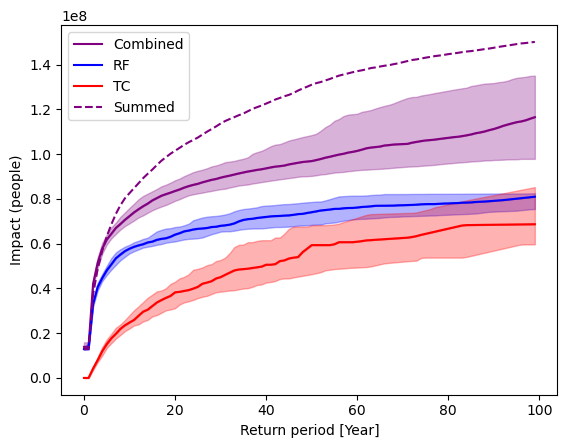

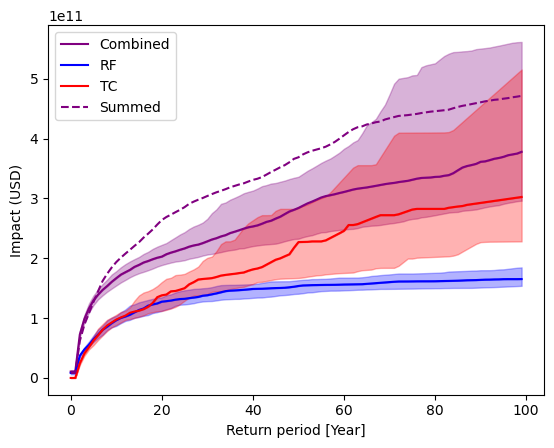

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def make_fq_list(impact):
    fq_list = []
    for n in range(1000):
        imp_sample = order_events_by_indices(impact, shuffle(np.arange(len(impact.event_name)))[0:500])
        fq = imp_sample.calc_freq_curve(np.arange(0,100))
        fq_list.append(fq.impact)
    return fq_list, fq.return_per

def plot_return_period_samples(fq_list, return_per, ax, color, label, range=False, linestyle="solid"):
    ax.plot(fq.return_per,np.median(fq_list,axis=0), color=color, label=label, linestyle=linestyle)
    ax.legend()
    if range:
        ax.fill_between(fq.return_per,np.median(fq_list,axis=0),np.percentile(fq_list,q=95,axis=0), color=color, alpha=0.3)
        ax.fill_between(fq.return_per,np.percentile(fq_list,q=5,axis=0), np.median(fq_list,axis=0),color=color, alpha=0.3)
    return ax


ylabel = {"assets":"Impact (USD)","pop":"Impact (people)"}

for exposure in ["pop", "assets"]:
    fig,ax = plt.subplots()

    fq_list, fq.return_per =  make_fq_list(impact_combined_ordered['1980_2010'][exposure][('TC','RF')])
    plot_return_period_samples(fq_list, fq.return_per, ax, color="Purple", label="Combined", range=True)

    fq_list_rf, fq.return_per =  make_fq_list(impacts_yearsets['1980_2010'][exposure]['RF'])
    plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="Blue", label="RF", range=True)

    fq_list_tc, fq.return_per =  make_fq_list(impacts_yearsets['1980_2010'][exposure]['TC'])
    plot_return_period_samples(fq_list_tc, fq.return_per, ax, color="Red", label="TC", range=True)


    fq_list_sumed = [fq_list_rf[n] + fq_list_tc[n] for n in range(len(fq_list_rf))]
    plot_return_period_samples(fq_list_sumed, fq.return_per, ax, color="purple", linestyle='dashed', label="Summed")
    ax.set_xlabel("Return period [Year]")
    ax.set_ylabel(ylabel[exposure])
    

    
    plt.savefig("".join(['/Users/szelie/Dropbox/Applications/Overleaf/multi_risk/figures/sum_vs_combi',exposure,".jpg"]), dpi=1200, bbox_inches='tight')

